Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Frame Number:  2730
Anomaly-fouced Temporal Sampling...
Sampled frames:  [16, 144, 288, 416, 544, 864, 1024, 1184, 1648, 1904, 2144, 2720]

User: Could you specify the anomaly events present in the video? 
HolmesVAU: The anomaly event involves a man in a blue hoodie and dark pants breaking into a house, entering a room, and then leaving the house, suggesting a potential burglary or theft


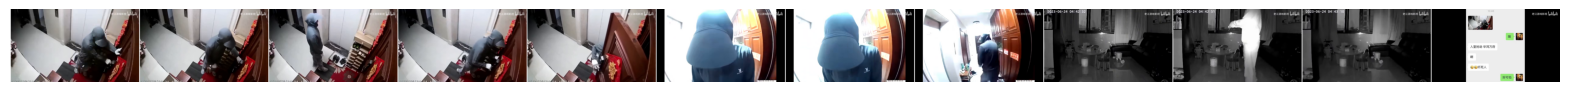

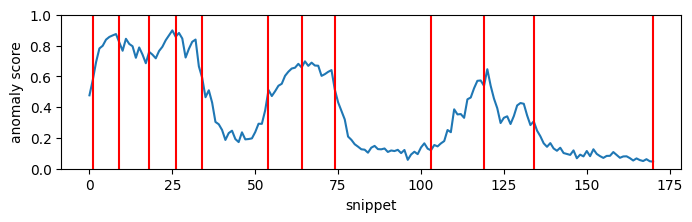

In [2]:
import os
import torch
from decord import VideoReader, cpu
import matplotlib.pyplot as plt
from holmesvau.holmesvau_utils import load_model, generate, show_smapled_video

mllm_path = './ckpts/HolmesVAU-2B'
sampler_path = './holmesvau/ATS/anomaly_scorer.pth'
device = torch.device('cuda:1')
model, tokenizer, generation_config, sampler = load_model(mllm_path, sampler_path, device)

video_path = "./examples/robbery.mp4"
prompt = "Could you specify the anomaly events present in the video?"
pred, history, frame_indices, anomaly_score = generate(video_path, prompt, model, tokenizer, generation_config, sampler, select_frames=12, use_ATS=True)
print('\nUser:', prompt, '\nHolmesVAU:', pred)

vr = VideoReader(video_path, ctx=cpu(0), num_threads=1)
show_smapled_video(vr, frame_indices)
if anomaly_score is not None:
    plt.figure(figsize=(8, 2))
    plt.plot(anomaly_score)
    for idx in frame_indices:
        plt.vlines(idx/16, 0, 1, colors='r')
    plt.ylim(0, 1)
    plt.xlabel('snippet')
    plt.ylabel('anomaly score')

